# Dataset Analysis

## Generation of Dataset

In [1]:
import random
import pandas as pd
import numpy as np
from datetime import datetime, timedelta



# Numeric variables

ages = [random.randint(18, 65) for i in range(100)]

weights = [random.randint(100, 250) for i in range(100)]

salaries = [random.randint(35000, 150000) for i in range(100)]



# Date variables

start_date = datetime.strptime("01/01/1995", "%m/%d/%Y")

end_date = datetime.strptime("01/01/2022", "%m/%d/%Y")

birthdates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for i in range(100)]

hire_dates = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for i in range(100)]



# Binary variables

genders = ["Male" if random.randint(0, 1) == 0 else "Female" for i in range(100)]

marital_status = ["Married" if random.randint(0, 1) == 0 else "Single" for i in range(100)]



# Categorical variables- Nominal

occupations = ["Engineer", "Teacher", "Doctor", "Lawyer"]

fav_colors = ["Red", "Green", "Blue", "Yellow"]

occupation = [random.choice(occupations) for i in range(100)]

fav_color = [random.choice(fav_colors) for i in range(100)]



# Categorical Variable- ordinal- Ordered



ratings = ["Low","Medium","High"]

ordering = ['low', 'medium', 'high']

# Generate 100 random values from the categories

data = list(np.random.choice(ordering, size=100))

# Convert the data to a list with the specified ordering

col = pd.Categorical(data, categories=ordering, ordered=True)

# Create dataframe

df = pd.DataFrame({

    "Age": ages,

    "Weight": weights,

    "Salary": salaries,

    "Birthdate": birthdates,

    "Hire date": hire_dates,

    "Gender": genders,

    "Marital Status": marital_status,

    "Occupation": occupation,

    "Favorite Color": fav_color,

    "Rating":col

})
df

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,Red,high
1,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high
2,47,200,111266,2011-07-28,2012-08-10,Female,Married,Lawyer,Blue,low
3,56,210,49928,2004-04-22,2020-08-05,Male,Married,Lawyer,Red,medium
4,33,178,79509,2006-10-11,2006-09-30,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
95,40,100,103372,1997-09-10,2007-11-22,Male,Married,Teacher,Blue,low
96,33,249,43986,2008-01-02,2017-07-28,Male,Married,Doctor,Red,medium
97,48,228,125857,2018-11-27,1996-04-08,Male,Married,Doctor,Yellow,high
98,19,191,48215,2008-02-11,2014-05-20,Female,Single,Lawyer,Red,high


## Inserting a Different Case ( Lower or Upper) in a dataframe column

In [2]:
df1 = df.copy()

# adding upper case of fav_color
df1.loc[0,'Favorite Color'] = 'GREEN'
df1.loc[1,'Favorite Color'] = 'BLUE'
df1

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,GREEN,high
1,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,BLUE,high
2,47,200,111266,2011-07-28,2012-08-10,Female,Married,Lawyer,Blue,low
3,56,210,49928,2004-04-22,2020-08-05,Male,Married,Lawyer,Red,medium
4,33,178,79509,2006-10-11,2006-09-30,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
95,40,100,103372,1997-09-10,2007-11-22,Male,Married,Teacher,Blue,low
96,33,249,43986,2008-01-02,2017-07-28,Male,Married,Doctor,Red,medium
97,48,228,125857,2018-11-27,1996-04-08,Male,Married,Doctor,Yellow,high
98,19,191,48215,2008-02-11,2014-05-20,Female,Single,Lawyer,Red,high


In [3]:
df1['Favorite Color'].unique()

array(['GREEN', 'BLUE', 'Blue', 'Red', 'Yellow', 'Green'], dtype=object)

We can see the green and blue are showing twice, because they are of different cases. This is an issue.

# Task 1: Check through all the text columns of the Dataframe and see if same word is written  in  Different Cases

## 1.1 Select only the column that contain text

In [4]:
text_cols=df1.select_dtypes(include='object').columns
text_cols

Index(['Gender', 'Marital Status', 'Occupation', 'Favorite Color'], dtype='object')

### 1.2. We define a dictionary that will capture the duplicate values

In [5]:
dup_dict={}

### 1.3 Loop through each text column in the dataframe and check for same values written in different cases

In [6]:
for col in text_cols:
    # drop the duplicate values in the columns, if there are any NAs, that too needs to be removed, for the task 
    df1[col]=df1[col].drop_duplicates().dropna()
    # Convert the text in the column to lowercase
    df1[col]=df1[col].str.lower()
    # Get the duplicate values now for that column
    dup_vals = df1[df1.duplicated(subset=[col],keep=False)][col].dropna().unique()
    # store the duplicate values in the dictionary
    if len(dup_vals)>0:
        dup_dict[col] =dup_vals
        
#print the dictionary of duplicated values for each text columns
if len(dup_dict)>0:
    print("The following columns contain the same text written in different cases.")
    for col,vals in dup_dict.items():
        print(f"{col}:{vals}")
else:
    print("No columns contain the same text written in differnt cases.")   
    

The following columns contain the same text written in different cases.
Favorite Color:['green' 'blue']


## Experiments with Boolean Masks. 

### First let's convert dictionary values of Favourite Color to Lists

In [7]:
mylist=list(dup_dict['Favorite Color'])
mylist

['green', 'blue']

### To check which column contain these values, first we create a boolean mask for the whole dataframe

In [8]:
df1.isin(mylist)

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


### To check if any of the columns contain true, we use any().any() with boolean mask

In [9]:
df1.isin(mylist).any().any()

True

### To check which column has these true values we use any() with boolean mask

In [10]:
df1.isin(mylist).any()

Age               False
Weight            False
Salary            False
Birthdate         False
Hire date         False
Gender            False
Marital Status    False
Occupation        False
Favorite Color     True
Rating            False
dtype: bool

### to check the Total Number of true values, we use sum().sum() with boolean mask

In [11]:
df1.isin(mylist).sum().sum()

4

### To check how many of these true values each column contains, we use sum() with boolean mask

In [12]:
df1.isin(mylist).sum()

Age               0
Weight            0
Salary            0
Birthdate         0
Hire date         0
Gender            0
Marital Status    0
Occupation        0
Favorite Color    4
Rating            0
dtype: int64

### To find the rows with these values, we  use .any(axis=1) with boolean mask

In [13]:
df1[df1.isin(mylist).any(axis=1)]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,female,single,engineer,green,high
1,26,101,87545,1997-02-13,2005-07-30,NaN,married,teacher,blue,high
2,47,200,111266,2011-07-28,2012-08-10,NaN,NaN,lawyer,blue,low
9,64,154,83255,2002-05-05,2011-08-08,NaN,NaN,NaN,green,high


# Task 2: Find the Duplicate Rows in a Dataframe

## Subtask 1.: Create and insert a duplicate row

In [14]:
# How to copy the second row and append it at the end
df2=df.copy()
df2.loc[df2.shape[0]]=df2.loc[1]
df2

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,Red,high
1,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high
2,47,200,111266,2011-07-28,2012-08-10,Female,Married,Lawyer,Blue,low
3,56,210,49928,2004-04-22,2020-08-05,Male,Married,Lawyer,Red,medium
4,33,178,79509,2006-10-11,2006-09-30,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
96,33,249,43986,2008-01-02,2017-07-28,Male,Married,Doctor,Red,medium
97,48,228,125857,2018-11-27,1996-04-08,Male,Married,Doctor,Yellow,high
98,19,191,48215,2008-02-11,2014-05-20,Female,Single,Lawyer,Red,high
99,28,145,113656,2019-05-10,1996-06-01,Female,Married,Engineer,Yellow,low


## Subtask 2: Discovering Duplicate Rows

In [15]:
duplicated_rows = df2.duplicated(keep=False)
duplicated_rows

0      False
1       True
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100     True
Length: 101, dtype: bool

In [16]:
duplicated_rows.any().any()

True

In [17]:
duplicated_rows.any()

True

In [18]:
duplicated_rows.sum().sum()

2

In [19]:
duplicated_rows.sum()

2

In [20]:
df2[duplicated_rows]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
1,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high
100,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high


# Task 3: Find the Outliers in a Dataframe

## Subtask 1.: Create and insert outliers

To create an outlier, we first convert the 100th row into a dictionary and then change the values in the numeric keys of the dictionary

In [21]:
df3=df.copy()
a = df3.loc[99].to_dict()
a

{'Age': 28,
 'Weight': 145,
 'Salary': 113656,
 'Birthdate': Timestamp('2019-05-10 00:00:00'),
 'Hire date': Timestamp('1996-06-01 00:00:00'),
 'Gender': 'Female',
 'Marital Status': 'Married',
 'Occupation': 'Engineer',
 'Favorite Color': 'Yellow',
 'Rating': 'low'}

Now we change the numeric values to the outliers

In [22]:
from pandas import Timestamp
b={'Age': 128,
 'Weight': 1199,
 'Salary': 134609,
 'Birthdate': Timestamp('2012-02-11 00:00:00'),
 'Hire date': Timestamp('2006-11-10 00:00:00'),
 'Gender': 'Female',
 'Marital Status': 'Single',
 'Occupation': 'Doctor',
 'Favorite Color': 'Red',
 'Rating': 'medium'}

Appending Back to the dataframe

In [23]:
df3.loc[len(df3)]=b
df3

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,Red,high
1,26,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high
2,47,200,111266,2011-07-28,2012-08-10,Female,Married,Lawyer,Blue,low
3,56,210,49928,2004-04-22,2020-08-05,Male,Married,Lawyer,Red,medium
4,33,178,79509,2006-10-11,2006-09-30,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
96,33,249,43986,2008-01-02,2017-07-28,Male,Married,Doctor,Red,medium
97,48,228,125857,2018-11-27,1996-04-08,Male,Married,Doctor,Yellow,high
98,19,191,48215,2008-02-11,2014-05-20,Female,Single,Lawyer,Red,high
99,28,145,113656,2019-05-10,1996-06-01,Female,Married,Engineer,Yellow,low


Now we shuffle the dataframe except the first row

In [24]:
# save the first row
row_not_to_shuffle = df3.loc[0]

# drop first row, shuffle and reset index
df3 = df3.drop(0).sample(frac=1).reset_index(drop=True)

# Add saved row back to the dataframe
df3 = pd.concat([pd.DataFrame([row_not_to_shuffle]),df3],ignore_index=True)
df3

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,Red,high
1,61,201,144915,2015-03-30,2010-02-08,Female,Married,Teacher,Red,low
2,37,212,62734,2001-06-14,2004-09-20,Female,Married,Teacher,Yellow,low
3,32,165,127221,2004-12-07,2018-01-20,Female,Single,Doctor,Yellow,low
4,64,155,119954,2012-06-02,2014-05-04,Female,Single,Teacher,Green,high
...,...,...,...,...,...,...,...,...,...,...
96,40,100,103372,1997-09-10,2007-11-22,Male,Married,Teacher,Blue,low
97,65,158,91360,2019-10-27,2007-10-16,Female,Married,Teacher,Blue,medium
98,56,113,73729,2010-05-05,1997-08-16,Female,Single,Engineer,Yellow,low
99,26,181,75170,2007-07-27,2005-05-13,Female,Single,Lawyer,Red,high


## Subtask2: Discover Outliers

In [30]:
from scipy.stats import zscore
numeric_cols = df3.select_dtypes(include='number').columns.tolist()

# Calculate the z-scores for each value in the numeric columns:
z_scores=np.abs(zscore(df3[numeric_cols]))

# Create a Boolean mask for the outliers (absolute z score >2)
outliers_mask=(abs(z_scores)>3)

# Convert the mask to a dataframe with the same column names
outliers_df = pd.DataFrame(outliers_mask,columns=numeric_cols)

# If you add the mask to the original dataframe for non numeric columns
for col in df3.columns:
    if col not in numeric_cols:
        outliers_df[col]=False
outliers_df

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False


### To check if any of the columns contain outliers, we use any().any() with boolean mask

In [31]:
outliers_df.any().any()

True

### To check which column Contain outliers we use any() with boolean mask

In [32]:
outliers_df.any()

Age                True
Weight             True
Salary            False
Birthdate         False
Hire date         False
Gender            False
Marital Status    False
Occupation        False
Favorite Color    False
Rating            False
dtype: bool

### to check the Total Number of outliers, we use sum().sum() with boolean mask

In [33]:
outliers_df.sum().sum()

2

### To check how many of outliers each column contains, we use sum() with boolean mask

In [34]:
outliers_df.sum()

Age               1
Weight            1
Salary            0
Birthdate         0
Hire date         0
Gender            0
Marital Status    0
Occupation        0
Favorite Color    0
Rating            0
dtype: int64

### To find the rows with these outliers, we  use .any(axis=1) with boolean mask

In [35]:
df3[outliers_df.any(axis=1)]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
63,128,1199,134609,2012-02-11,2006-11-10,Female,Single,Doctor,Red,medium


# Task 4: Find the Rows with Same Values

## Subtask 1.: Create and Such Rows

### Subsubtask1: Adding a Row of Zeros and ones randomly in a df

In [36]:
df4=df.copy()
# First we create a random position
random_pos = random.randint(0,len(df4))

# Adding a row of zeros

#we create a row series of all zeros
new_row = pd.Series(np.zeros(len(df4.columns)),index=df4.columns)
# Then we insert the row
df4=pd.concat([df4.iloc[:random_pos],pd.DataFrame([new_row]),df4.iloc[random_pos:]]).reset_index(drop=True)

# Adding a row of Ones

random_pos1 = random.randint(0,len(df4))
#we create a row series of all ones
new_row = pd.Series(np.ones(len(df4.columns)),index=df4.columns)
# Then we insert the row
df4=pd.concat([df4.iloc[:random_pos1],pd.DataFrame([new_row]),df4.iloc[random_pos1:]]).reset_index(drop=True)
df4

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21.0,207.0,148566.0,2005-08-27 00:00:00,2006-01-15 00:00:00,Female,Single,Engineer,Red,high
1,26.0,101.0,87545.0,1997-02-13 00:00:00,2005-07-30 00:00:00,Female,Married,Teacher,Red,high
2,47.0,200.0,111266.0,2011-07-28 00:00:00,2012-08-10 00:00:00,Female,Married,Lawyer,Blue,low
3,56.0,210.0,49928.0,2004-04-22 00:00:00,2020-08-05 00:00:00,Male,Married,Lawyer,Red,medium
4,33.0,178.0,79509.0,2006-10-11 00:00:00,2006-09-30 00:00:00,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
97,33.0,249.0,43986.0,2008-01-02 00:00:00,2017-07-28 00:00:00,Male,Married,Doctor,Red,medium
98,48.0,228.0,125857.0,2018-11-27 00:00:00,1996-04-08 00:00:00,Male,Married,Doctor,Yellow,high
99,19.0,191.0,48215.0,2008-02-11 00:00:00,2014-05-20 00:00:00,Female,Single,Lawyer,Red,high
100,28.0,145.0,113656.0,2019-05-10 00:00:00,1996-06-01 00:00:00,Female,Married,Engineer,Yellow,low


## Subtask 1.: Discover Rows with Same values

In [37]:
rows_with_equal_values = df4.apply(lambda x: x.nunique()==1,axis=1)
rows_with_equal_values

0      False
1      False
2      False
3      False
4      False
       ...  
97     False
98     False
99     False
100    False
101     True
Length: 102, dtype: bool

In [38]:
rows_with_equal_values.any().any()

True

In [39]:
rows_with_equal_values.any()

True

In [40]:
rows_with_equal_values.sum().sum()

2

In [41]:
rows_with_equal_values.sum()

2

In [42]:
df4[rows_with_equal_values]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
64,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task 5: Find the Rows with All Blank Values

## Subtask 1.: Create and Such Rows

### Subsubtask1: Adding a Row of nan randomly in a df

In [43]:
df5=df.copy()
# First we create a random position
random_pos = random.randint(0,len(df5))

#we create a row series of all zeros
new_row = pd.Series(np.nan*(len(df5.columns)),index=df5.columns)
# Then we insert the row
df5=pd.concat([df5.iloc[:random_pos],pd.DataFrame([new_row]),df5.iloc[random_pos:]]).reset_index(drop=True)

### Subtask 2: Discover rows with Blank or missing Values

In [44]:
all_nan_rows = df5.isna().all(axis=1)
all_nan_rows

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [45]:
all_nan_rows.any().any()

True

In [46]:
all_nan_rows.any()

True

In [47]:
all_nan_rows.sum().sum()

1

In [48]:
all_nan_rows.sum()

1

In [49]:
df5[all_nan_rows]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
16,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


# Task 6: Find the Rows with a special character, space or an NA randomly at any place

## Subtask 1.: Create Such Rows

### Subsubtask1: Adding a special character, Nan and a blank space

In [50]:
df6=df.copy()
# randomly insert a special character
row,col=random.randint(0,df6.shape[0]-1),random.randint(0,df6.shape[1]-1)
df6.iat[row,col]=str(df6.iat[row,col])+'*'

# randomly insert Nan
row,col=random.randint(0,df6.shape[0]-1),random.randint(0,df6.shape[1]-1)
df6.iat[row,col]=np.nan

# randomly insert Nan
row,col=random.randint(0,df6.shape[0]-1),random.randint(0,df6.shape[1]-1)
df6.iat[row,col]='  '

df6


,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
0,21.0,207,148566,2005-08-27,2006-01-15,Female,Single,Engineer,Red,high
1,26.0,101,87545,1997-02-13,2005-07-30,Female,Married,Teacher,Red,high
2,47.0,200,111266,2011-07-28,2012-08-10,Female,Married,Lawyer,Blue,low
3,56.0,210,49928,2004-04-22,2020-08-05,Male,Married,Lawyer,Red,medium
4,33.0,178,79509,2006-10-11,2006-09-30,Female,Married,Engineer,Blue,medium
...,...,...,...,...,...,...,...,...,...,...
95,40.0,100,103372,1997-09-10,2007-11-22,Male,Married,Teacher,Blue,low
96,33.0,249,43986,2008-01-02,2017-07-28,Male,Married,Doctor,Red,medium
97,48.0,228,125857,2018-11-27,1996-04-08,Male,Married,Doctor,Yellow,high
98,19.0,191,48215,2008-02-11,2014-05-20,Female,Single,Lawyer,Red,high


### Subtask: Discovering special characters

In [52]:
import re
# Check for special characters
is_specialcharacter=df6.applymap(lambda x: isinstance(x, str) and bool(re.search('[^A-Za-z0-9]', x))).any(axis=1)
is_specialcharacter.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [53]:
is_specialcharacter.any()

True

In [54]:
is_specialcharacter.any().any()

True

In [55]:
is_specialcharacter.sum()

2

In [56]:
is_specialcharacter.sum().sum()

2

In [57]:
df6[is_specialcharacter]

,Age,Weight,Salary,Birthdate,Hire date,Gender,Marital Status,Occupation,Favorite Color,Rating
24,39.0,249,,2014-12-15,1999-12-06,Female,Married,Doctor,Yellow,medium
77,26.0,243,79876,2012-04-24,1998-07-13,Female,Single,Teacher,Red*,high


### Subtask: Discovering Blank spaces and Nans

In [58]:
import re
# Replace strings that are entirely blank spaces with None
df6.replace(r'^\s+$', None, regex=True, inplace=True)

# Check for rows with NaN values
is_blankrow = df6.isna().any(axis=1)
is_blankrow.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [59]:
is_blankrow.any()

True

In [60]:
is_blankrow.any().any()

True

In [61]:
is_blankrow.sum()

2

In [62]:
is_blankrow.sum().sum()

2

In [63]:
df6[is_blankrow]   h=pd.concat([h,sample_value])

SyntaxError: invalid syntax (1945262582.py, line 1)

# 7 Checking if the df columns have different Datatypes
ideally there should be 1 or 2 datatypes,one is index datatype and the other is that of column

In [65]:
df7 = df.copy()

# List to store columns with mixed datatypes
mixed_dtype_cols = []

for col in df7:
    unique_types = df7[col].map(type).unique()
    if len(unique_types) > 1:
        mixed_dtype_cols.append(col)
        print(col, 'Data Types:', unique_types)

if not mixed_dtype_cols:
    print("There is no column with a different datatype, good to go")
else:
    print("There are columns with different datatypes, please check")
    for col in mixed_dtype_cols:
        unique_types = df7[col].map(type).unique()
        print("===================")
        print(col, "Data Types Value Counts:")
        
        for dtype in unique_types:
            count = df7[df7[col].apply(lambda x: isinstance(x, dtype))][col].count()
            print(f"{dtype}: {count}")
            
            # Display the first 2 rows of this data type
            sample_rows = df7[df7[col].apply(lambda x: isinstance(x, dtype))].head(2)
            print("Sample Rows:")
            print(sample_rows)
        
        print("===================")


There is no column with a different datatype, good to go


# Task 8: Find the gap in the Date Column
If the Value counts of date difference is unequal then there is a gap

In [68]:
df8=df.copy()
# Convert the date column to a datetime format if it isn't already
df8['Birthdate'] = pd.to_datetime(df['Birthdate'])

# Sort the dataframe by date
df8 = df8.sort_values(by='Birthdate')

# Calculate the difference between consecutive dates
df8['date_diff'] = df8['Birthdate'].diff()
df8['date_diff'].value_counts()

39 days     3
3 days      3
86 days     2
40 days     2
159 days    2
           ..
109 days    1
121 days    1
62 days     1
362 days    1
7 days      1
Name: date_diff, Length: 81, dtype: int64

# Task 9: To find if there is a correlation between the Numeric Columns

We can also find from straight lines if some columns are formulated. We create a column Age2 from Age and see.

In [75]:
df9=df.copy()

In [76]:
df9['Age2']=df9['Age']*2

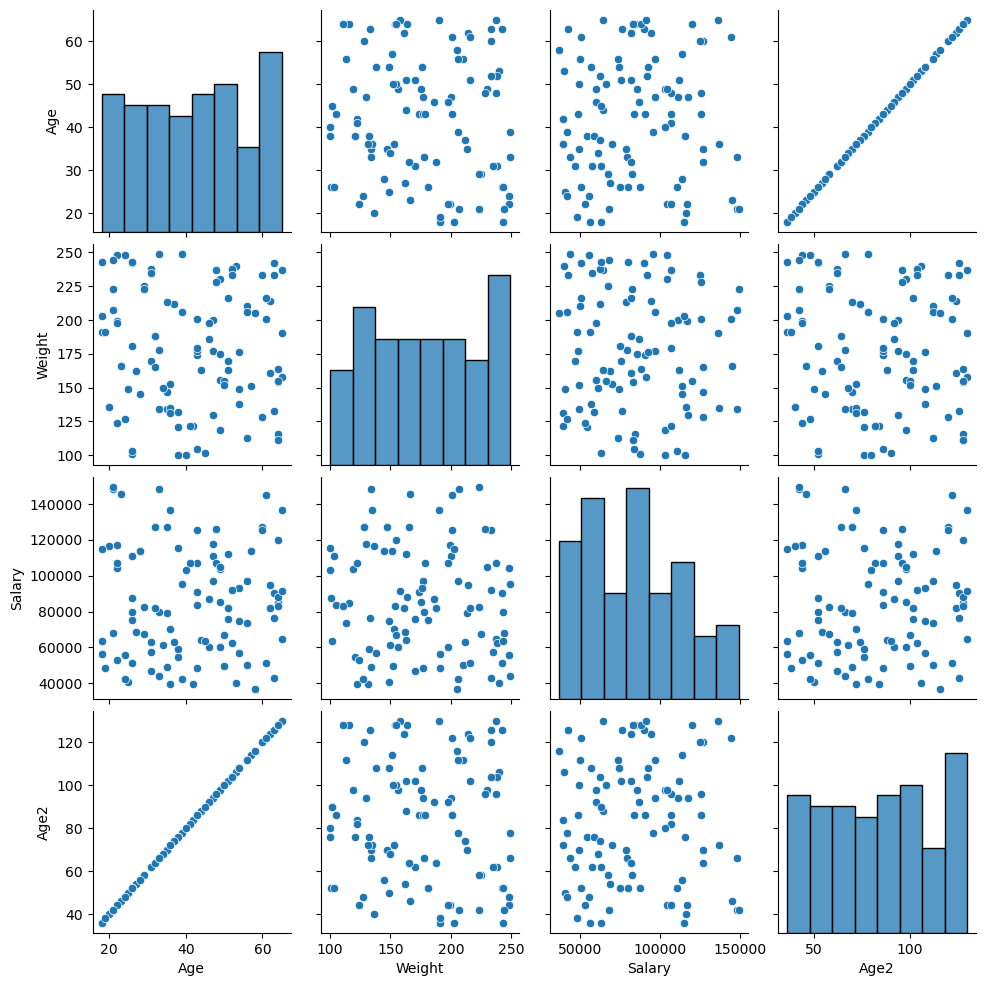

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df9)